In [1]:
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
accept_file_path = "Data/accepted_2007_to_2018Q4.csv"

In [3]:
#reading accept csv file
accept_df = pd.read_csv(accept_file_path)

C:\Users\glori\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
reject_file_path = "Data/rejected_2007_to_2018Q4.csv"

In [5]:
#reading reject csv file
reject_df = pd.read_csv(reject_file_path)

In [6]:
list(accept_df)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [7]:
list(reject_df)

['Amount Requested',
 'Application Date',
 'Loan Title',
 'Risk_Score',
 'Debt-To-Income Ratio',
 'Zip Code',
 'State',
 'Employment Length',
 'Policy Code']

In [8]:
print(reject_df['Loan Title'].unique())
print('-------------------')
print(accept_df['purpose'].unique())
print('-------------------')
print(accept_df['title'].unique())

['Wedding Covered but No Honeymoon' 'Consolidating Debt'
 'Want to consolidate my debt' ... 'dougie03' 'freeup'
 'Business Advertising Loan']
-------------------
['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'
 'credit_card' 'other' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding' 'educational' nan]
-------------------
['Debt consolidation' 'Business' nan ... 'takeitaway' 'Creditt Card Loan'
 'debt reduction/hone updates']


In [9]:
#needed columns from the accepted data
clean_accept_df = accept_df[[
    'loan_amnt',
    'issue_d',
    'fico_range_high',
    'dti',
    'zip_code',
    'addr_state',
    'emp_length',
    'purpose'
]]

In [10]:
#columns from the rejected data
clean_reject_df = reject_df[['Amount Requested',
 'Application Date',
 'Risk_Score',
 'Debt-To-Income Ratio',
 'Zip Code',
 'State',
 'Employment Length',
 'Loan Title']]

In [11]:
clean_accept_df.shape

(2260701, 8)

In [12]:
clean_reject_df.shape

(27648741, 8)

In [13]:
#added target value to the accepted data
clean_accept_df['Loan Status'] = "Accepted"
clean_accept_df.head()

<ipython-input-13-5e810bf9972e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_accept_df['Loan Status'] = "Accepted"


,loan_amnt,issue_d,fico_range_high,dti,zip_code,addr_state,emp_length,purpose,Loan Status
0,3600.0,Dec-2015,679.0,5.91,190xx,PA,10+ years,debt_consolidation,Accepted
1,24700.0,Dec-2015,719.0,16.06,577xx,SD,10+ years,small_business,Accepted
2,20000.0,Dec-2015,699.0,10.78,605xx,IL,10+ years,home_improvement,Accepted
3,35000.0,Dec-2015,789.0,17.06,076xx,NJ,10+ years,debt_consolidation,Accepted
4,10400.0,Dec-2015,699.0,25.37,174xx,PA,3 years,major_purchase,Accepted


In [14]:
# adding a target value to the rejected data
clean_reject_df['Loan Status'] = "Rejected"
clean_reject_df.head()

,Amount Requested,Application Date,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Loan Title,Loan Status
0,1000.0,2007-05-26,693.0,10%,481xx,NM,4 years,Wedding Covered but No Honeymoon,Rejected
1,1000.0,2007-05-26,703.0,10%,010xx,MA,< 1 year,Consolidating Debt,Rejected
2,11000.0,2007-05-27,715.0,10%,212xx,MD,1 year,Want to consolidate my debt,Rejected
3,6000.0,2007-05-27,698.0,38.64%,017xx,MA,< 1 year,waksman,Rejected
4,1500.0,2007-05-27,509.0,9.43%,209xx,MD,< 1 year,mdrigo,Rejected


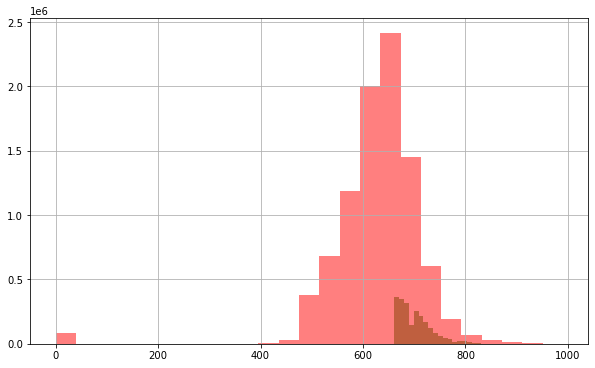

In [15]:
#histogram correlation b/t fico score and Risk Score
plt.figure(figsize=(10,6))
clean_accept_df["fico_range_high"].hist(alpha=.5, color='green', bins=25), clean_reject_df["Risk_Score"].hist(alpha=.5, color='red', bins=25)
plt.show()

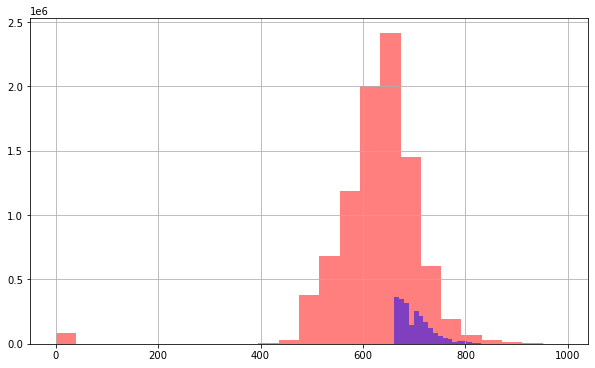

In [16]:
#correlation b/t Risk Score and fico
plt.figure(figsize=(10,6))
clean_reject_df["Risk_Score"].hist(alpha=.5, color='red', bins=25), clean_accept_df["fico_range_high"].hist(alpha=.5, color='blue', bins=25)
plt.show()

In [17]:
print(clean_accept_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   loan_amnt        float64
 1   issue_d          object 
 2   fico_range_high  float64
 3   dti              float64
 4   zip_code         object 
 5   addr_state       object 
 6   emp_length       object 
 7   purpose          object 
 8   Loan Status      object 
dtypes: float64(3), object(6)
memory usage: 155.2+ MB
None


In [18]:
print(clean_reject_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Risk_Score            float64
 3   Debt-To-Income Ratio  object 
 4   Zip Code              object 
 5   State                 object 
 6   Employment Length     object 
 7   Loan Title            object 
 8   Loan Status           object 
dtypes: float64(2), object(7)
memory usage: 1.9+ GB
None


In [19]:
#accepted issue date as date
clean_accept_df['issue_d'] = pd.to_datetime(clean_accept_df['issue_d'])
clean_accept_df.head()

<ipython-input-19-4db1f5c7d393>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_accept_df['issue_d'] = pd.to_datetime(clean_accept_df['issue_d'])


,loan_amnt,issue_d,fico_range_high,dti,zip_code,addr_state,emp_length,purpose,Loan Status
0,3600.0,2015-12-01,679.0,5.91,190xx,PA,10+ years,debt_consolidation,Accepted
1,24700.0,2015-12-01,719.0,16.06,577xx,SD,10+ years,small_business,Accepted
2,20000.0,2015-12-01,699.0,10.78,605xx,IL,10+ years,home_improvement,Accepted
3,35000.0,2015-12-01,789.0,17.06,076xx,NJ,10+ years,debt_consolidation,Accepted
4,10400.0,2015-12-01,699.0,25.37,174xx,PA,3 years,major_purchase,Accepted


In [20]:
#2018 accept data
accept_filtered_df = clean_accept_df[clean_accept_df['issue_d'].dt.year==2018]
accept_filtered_df.head()

,loan_amnt,issue_d,fico_range_high,dti,zip_code,addr_state,emp_length,purpose,Loan Status
421097,5000.0,2018-03-01,669.0,21.80,740xx,OK,8 years,other,Accepted
421098,15000.0,2018-03-01,704.0,18.29,337xx,FL,2 years,debt_consolidation,Accepted
421099,11200.0,2018-03-01,669.0,43.97,030xx,NH,< 1 year,medical,Accepted
421100,25000.0,2018-03-01,669.0,12.89,361xx,AL,10+ years,debt_consolidation,Accepted
421101,3000.0,2018-03-01,764.0,0.58,988xx,WA,9 years,major_purchase,Accepted


In [21]:
#see the array
accept_filtered_df ['issue_d'].dt.year.unique()

array([2018], dtype=int64)

In [22]:
#rejected application date as date
clean_reject_df['Application Date'] = pd.to_datetime(clean_reject_df['Application Date'])
clean_reject_df.head()

,Amount Requested,Application Date,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Loan Title,Loan Status
0,1000.0,2007-05-26,693.0,10%,481xx,NM,4 years,Wedding Covered but No Honeymoon,Rejected
1,1000.0,2007-05-26,703.0,10%,010xx,MA,< 1 year,Consolidating Debt,Rejected
2,11000.0,2007-05-27,715.0,10%,212xx,MD,1 year,Want to consolidate my debt,Rejected
3,6000.0,2007-05-27,698.0,38.64%,017xx,MA,< 1 year,waksman,Rejected
4,1500.0,2007-05-27,509.0,9.43%,209xx,MD,< 1 year,mdrigo,Rejected


In [23]:
#2018 reject data
reject_filtered_df = clean_reject_df[clean_reject_df['Application Date'].dt.year==2018]
reject_filtered_df.head()

,Amount Requested,Application Date,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Loan Title,Loan Status
4404427,3000.0,2018-07-01,NaN,100%,925xx,CA,< 1 year,Debt consolidation,Rejected
4404428,40000.0,2018-07-01,NaN,7.45%,335xx,FL,< 1 year,Major purchase,Rejected
4404429,16000.0,2018-07-01,NaN,34.93%,156xx,PA,< 1 year,Debt consolidation,Rejected
4404430,40000.0,2018-07-01,NaN,27.87%,957xx,CA,< 1 year,Debt consolidation,Rejected
4404431,300000.0,2018-07-01,NaN,-1%,258xx,TN,< 1 year,Business Loan,Rejected


In [24]:
#see the array
reject_filtered_df ['Application Date'].dt.year.unique()

array([2018], dtype=int64)

In [25]:
accept_filtered_df = accept_filtered_df.rename(columns={"loan_amnt": "Amount_Requested", 
                            "issue_d": "Application_Date",
                            "fico_range_high": "Risk_Score",
                            "dti": "debt_to_income_ratio",
                            "addr_state": "State",
                            "emp_length": "Employment_Length",
                            "purpose": "Purpose",
                            "Loan Status": "Loan_Status",
                            })
                

In [26]:
reject_filtered_df = reject_filtered_df.rename(columns={"Amount Requested": "Amount_Requested",
                            "Application Date": "Application_Date",
                            "Risk_Score": "Risk_Score",
                            "Debt-To-Income Ratio": "debt_to_income_ratio",
                            "Zip Code": "zip_code",
                            "Employment Length": "Employment_Length",
                            "Loan Title": "Purpose",
                            "Loan Status": "Loan_Status"
                            })


In [27]:
accept_filtered_df.head()

,Amount_Requested,Application_Date,Risk_Score,debt_to_income_ratio,zip_code,State,Employment_Length,Purpose,Loan_Status
421097,5000.0,2018-03-01,669.0,21.80,740xx,OK,8 years,other,Accepted
421098,15000.0,2018-03-01,704.0,18.29,337xx,FL,2 years,debt_consolidation,Accepted
421099,11200.0,2018-03-01,669.0,43.97,030xx,NH,< 1 year,medical,Accepted
421100,25000.0,2018-03-01,669.0,12.89,361xx,AL,10+ years,debt_consolidation,Accepted
421101,3000.0,2018-03-01,764.0,0.58,988xx,WA,9 years,major_purchase,Accepted


In [28]:
reject_filtered_df.head()

,Amount_Requested,Application_Date,Risk_Score,debt_to_income_ratio,zip_code,State,Employment_Length,Purpose,Loan_Status
4404427,3000.0,2018-07-01,NaN,100%,925xx,CA,< 1 year,Debt consolidation,Rejected
4404428,40000.0,2018-07-01,NaN,7.45%,335xx,FL,< 1 year,Major purchase,Rejected
4404429,16000.0,2018-07-01,NaN,34.93%,156xx,PA,< 1 year,Debt consolidation,Rejected
4404430,40000.0,2018-07-01,NaN,27.87%,957xx,CA,< 1 year,Debt consolidation,Rejected
4404431,300000.0,2018-07-01,NaN,-1%,258xx,TN,< 1 year,Business Loan,Rejected


In [29]:
#categorical data to numerical data (accept)
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '< 1 year'), "Employment_Length"] = 0
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '1 year'), "Employment_Length"] = 1
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '2 years'), "Employment_Length"] = 2
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '3 years'), "Employment_Length"] = 3
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '4 years'), "Employment_Length"] = 4
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '5 years'), "Employment_Length"] = 5
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '6 years'), "Employment_Length"] = 6
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '7 years'), "Employment_Length"] = 7
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '8 years'), "Employment_Length"] = 8
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '9 years'), "Employment_Length"] = 9
accept_filtered_df.loc[(accept_filtered_df.Employment_Length == '10+ years'), "Employment_Length"] = 10

In [30]:
#categorical data to numerical data (reject)
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '< 1 year'), "Employment_Length"] = 0
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '1 year'), "Employment_Length"] = 1
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '2 years'), "Employment_Length"] = 2
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '3 years'), "Employment_Length"] = 3
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '4 years'), "Employment_Length"] = 4
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '5 years'), "Employment_Length"] = 5
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '6 years'), "Employment_Length"] = 6
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '7 years'), "Employment_Length"] = 7
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '8 years'), "Employment_Length"] = 8
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '9 years'), "Employment_Length"] = 9
reject_filtered_df.loc[(reject_filtered_df.Employment_Length == '10+ years'), "Employment_Length"] = 10

In [31]:
print(reject_filtered_df["Employment_Length"].unique())
print("------------------------")
print(accept_filtered_df["Employment_Length"].unique())

[0 nan 2 1 5 9 10 8 3 4 7 6]
------------------------
[8 2 0 10 9 nan 5 4 1 7 3 6]


In [32]:
#fix dti in reject filtered df to match dti in accept df
reject_filtered_df["debt_to_income_ratio"] = pd.to_numeric(reject_filtered_df["debt_to_income_ratio"].astype(str).str[:-1], errors="coerce")
reject_filtered_df

,Amount_Requested,Application_Date,Risk_Score,debt_to_income_ratio,zip_code,State,Employment_Length,Purpose,Loan_Status
4404427,3000.0,2018-07-01,NaN,100.00,925xx,CA,0,Debt consolidation,Rejected
4404428,40000.0,2018-07-01,NaN,7.45,335xx,FL,0,Major purchase,Rejected
4404429,16000.0,2018-07-01,NaN,34.93,156xx,PA,0,Debt consolidation,Rejected
4404430,40000.0,2018-07-01,NaN,27.87,957xx,CA,0,Debt consolidation,Rejected
4404431,300000.0,2018-07-01,NaN,-1.00,258xx,TN,0,Business Loan,Rejected
...,...,...,...,...,...,...,...,...,...
19699071,17000.0,2018-06-30,NaN,26.60,301xx,GA,0,Credit card refinancing,Rejected
19699072,2000.0,2018-06-30,NaN,0.00,117xx,NY,0,Business,Rejected
19699073,2500.0,2018-06-30,567.0,0.00,366xx,AL,2,Car financing,Rejected
19699074,4500.0,2018-06-30,NaN,4.65,780xx,TX,0,Other,Rejected


In [33]:
final_accept_df = accept_filtered_df.drop(['zip_code', 'Application_Date'], axis = 1)
final_reject_df = reject_filtered_df.drop(['zip_code', 'Application_Date'], axis = 1)

In [34]:
print(final_accept_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495242 entries, 421097 to 1611876
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Amount_Requested      495242 non-null  float64
 1   Risk_Score            495242 non-null  float64
 2   debt_to_income_ratio  494110 non-null  float64
 3   State                 495242 non-null  object 
 4   Employment_Length     453255 non-null  object 
 5   Purpose               495242 non-null  object 
 6   Loan_Status           495242 non-null  object 
dtypes: float64(3), object(4)
memory usage: 30.2+ MB
None


In [35]:
print(final_reject_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9496782 entries, 4404427 to 19699075
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount_Requested      float64
 1   Risk_Score            float64
 2   debt_to_income_ratio  float64
 3   State                 object 
 4   Employment_Length     object 
 5   Purpose               object 
 6   Loan_Status           object 
dtypes: float64(3), object(4)
memory usage: 579.6+ MB
None


In [36]:
#drop na values in accept df
final_accept_df = final_accept_df.dropna()
final_accept_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453176 entries, 421097 to 1611876
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Amount_Requested      453176 non-null  float64
 1   Risk_Score            453176 non-null  float64
 2   debt_to_income_ratio  453176 non-null  float64
 3   State                 453176 non-null  object 
 4   Employment_Length     453176 non-null  object 
 5   Purpose               453176 non-null  object 
 6   Loan_Status           453176 non-null  object 
dtypes: float64(3), object(4)
memory usage: 27.7+ MB


In [37]:
#drop na values in reject df
final_reject_df = final_reject_df.dropna()
final_reject_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628344 entries, 4404458 to 19699073
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Amount_Requested      628344 non-null  float64
 1   Risk_Score            628344 non-null  float64
 2   debt_to_income_ratio  628344 non-null  float64
 3   State                 628344 non-null  object 
 4   Employment_Length     628344 non-null  object 
 5   Purpose               628344 non-null  object 
 6   Loan_Status           628344 non-null  object 
dtypes: float64(3), object(4)
memory usage: 38.4+ MB


In [38]:
filenames = [final_accept_df, final_reject_df]
combined_data = pd.concat(filenames)

In [39]:
combined_data["Employment_Length"].astype(str).astype(float)

421097       8.0
421098       2.0
421099       0.0
421100      10.0
421101       9.0
            ... 
19698926     5.0
19698936     0.0
19698996     0.0
19699052     0.0
19699073     2.0
Name: Employment_Length, Length: 1081520, dtype: float64

In [40]:
combined_data

,Amount_Requested,Risk_Score,debt_to_income_ratio,State,Employment_Length,Purpose,Loan_Status
421097,5000.0,669.0,21.80,OK,8,other,Accepted
421098,15000.0,704.0,18.29,FL,2,debt_consolidation,Accepted
421099,11200.0,669.0,43.97,NH,0,medical,Accepted
421100,25000.0,669.0,12.89,AL,10,debt_consolidation,Accepted
421101,3000.0,764.0,0.58,WA,9,major_purchase,Accepted
...,...,...,...,...,...,...,...
19698926,3000.0,535.0,1.54,CT,5,Medical expenses,Rejected
19698936,6000.0,580.0,5.55,TX,0,Car financing,Rejected
19698996,3000.0,561.0,0.00,OR,0,Debt consolidation,Rejected
19699052,2500.0,573.0,8.55,NY,0,Other,Rejected


In [41]:
combined_data.shape

(1081520, 7)

In [42]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081520 entries, 421097 to 19699073
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Amount_Requested      1081520 non-null  float64
 1   Risk_Score            1081520 non-null  float64
 2   debt_to_income_ratio  1081520 non-null  float64
 3   State                 1081520 non-null  object 
 4   Employment_Length     1081520 non-null  object 
 5   Purpose               1081520 non-null  object 
 6   Loan_Status           1081520 non-null  object 
dtypes: float64(3), object(4)
memory usage: 66.0+ MB


In [43]:
combined_data.to_csv('Data/model_1_combine_data.csv')

In [44]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\glori\anaconda3\lib\site-packages (0.0)
